In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [174]:
rul = pd.read_csv("data/RUL_FD001.txt", header=None).values.reshape(-1)
df_train = pd.read_csv("data/train_FD001.txt", sep=' ', header=None)
df_train = df_train.drop(df_train.columns[-2:], axis=1)
df_test = pd.read_csv("data/test_FD001.txt", sep=' ', header=None)
df_test = df_test.drop(df_test.columns[-2:], axis=1)

In [175]:
column_selected = df_train[df_train.iloc[:, 0] == 1].std() > 1e-10
column_selected[0:5] = True

In [176]:
column_selected

0      True
1      True
2      True
3      True
4      True
5     False
6      True
7      True
8      True
9     False
10    False
11     True
12     True
13     True
14    False
15     True
16     True
17     True
18     True
19     True
20    False
21     True
22    False
23    False
24     True
25     True
dtype: bool

In [177]:
df_train = df_train.loc[:, column_selected]
df_test = df_test.loc[:, column_selected]

In [178]:
scaler = MinMaxScaler(feature_range=(-1, 1))
data_train = scaler.fit_transform(df_train.iloc[:, 5:])
data_test = scaler.fit_transform(df_test.iloc[:, 5:])

In [232]:
np.arange(10, 5, -1)

array([10,  9,  8,  7,  6])

In [233]:
window_size = 30
train_X = []
train_unit = []
train_label = []


for i in range(1, 101):
    data_unit = data_train[df_train.iloc[:, 0] == i]
    for j in range(len(data_unit)-window_size):
        train_X.append(data_unit[i:i+window_size, :])
        train_unit.append(i)

    y_unit = np.arange(rul[i-1]-window_size-1, rul[i-1]-len(data_unit)-1, -1)
    y_unit[y_unit<0.] = 0.

    # y_unit = np.zeros(len(data_unit))
    # if len(y_unit)>=rul[i-1]:
    #     y_unit[:rul[i-1]] = np.arange(rul[i-1])[::-1]
    # else:
    #     y_unit = np.arange(rul[i-1])[:len(y_unit):-1]
    # y_unit = y_unit[window_size:]
    train_label += list(y_unit)

train_X = np.array(train_X)
train_unit = np.array(train_unit)
train_label = np.array(train_label)

RUL is smaller than window

In [248]:
train_X[train_unit==40].shape

(158, 30, 14)

In [245]:
train_label[train_unit==40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

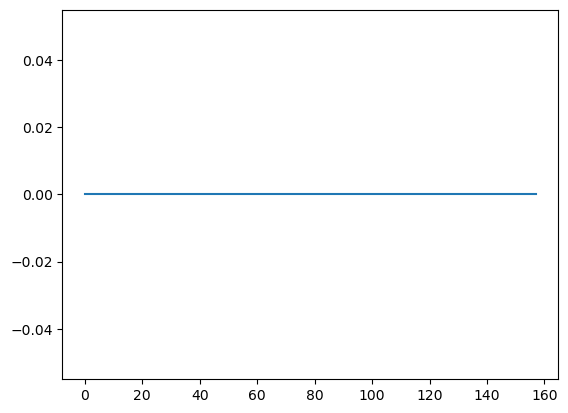

In [244]:
plt.plot(train_label[train_unit==40])

In [141]:
df_train[df_train.iloc[:, 0]==1]

,0,1,2,3,4,6,7,8,11,12,13,15,16,17,18,19,21,24,25
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,643.75,1602.38,1422.78,551.94,2388.31,9037.91,48.00,519.79,2388.23,8117.69,8.5207,396,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,644.18,1596.17,1428.01,550.70,2388.27,9044.55,48.08,519.58,2388.33,8117.51,8.5183,395,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,643.64,1599.22,1425.95,551.29,2388.29,9040.58,48.33,520.04,2388.35,8112.58,8.5223,398,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,643.34,1602.36,1425.77,550.92,2388.28,9042.76,48.15,519.57,2388.30,8114.61,8.5174,394,38.45,23.1295


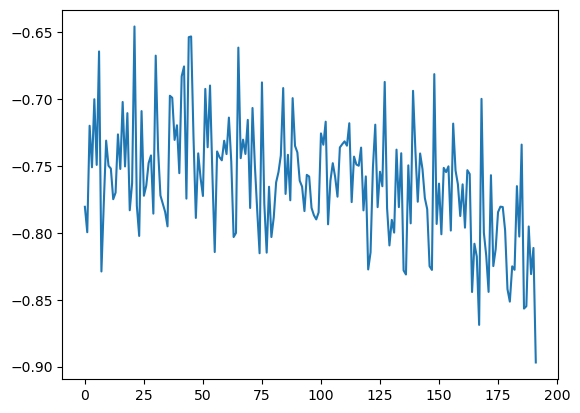

In [142]:
plt.plot(data_train[:192, 5])

In [124]:
rul

,0
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117
